# Linear Regression in 1D

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
from IPython.display import HTML, display
%matplotlib inline 

EXAMPLE) Linear Regression in 1D

- Let us draw out an example similar to last week. However much more simple to understand our algorithm.
- Let us say our data is:
    * Size in square feet in thousands
    * Price in dollars in hundreds of thousands
- Let us create very simple data of only a few points so we can do out the math effectively and easily

In [2]:
#create a dataframe and apply data
df_data1 = pd.DataFrame()
size = [1,2,3]
price = [2,3,5]
df_data1['size'] = size
df_data1['price'] = price

In [3]:
df_data1

,size,price
0,1,2
1,2,3
2,3,5


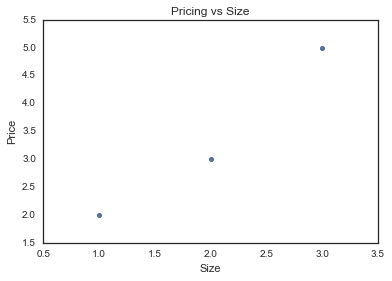

In [4]:
plt.scatter(df_data1['size'], df_data1['price'])
plt.title('Pricing vs Size')
plt.xlabel('Size')
plt.ylabel('Price')

## Notation:
- Number of examples we call N
- Features = input variables in this case just one Size
- Target = output variable in this case Price

# What is the Machine Learning Process. Let's Remember!

<img src='pics/TrainTest.png'>

### What is h(x)? It is the hypothesis function the function that we have learned that we think will predict the data best! Let's explore more what these options may be.

- h(X) takes the form of a linear equation
- $h(x) = w_0 + w_1 x$
- But what are the values for $w_0$ and $w_1$?

#### Idea: Choose $w_0$ and $w_1$ so that $h(x)$ is close to $y$ for our training examples $(x,y)$

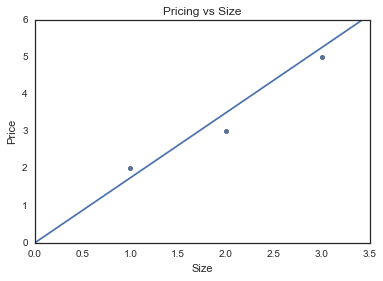

In [5]:
plt.scatter(df_data1['size'], df_data1['price'])
plt.title('Pricing vs Size')
plt.xlabel('Size')
plt.ylabel('Price')
plt.ylim(0,6)
plt.xlim(0,3.5)

#try to test lines try all different values to show how we can see the different lines that work?
#for simplicity the intercept will be 0
x = np.arange(5)
plt.plot(x, 1.75 * x)

#Let's try to define a cost function. So something that measure how good or how bad our line is.

- Cost Function = $\frac{1}{2N}*\Sigma((h(x^{(i)} - y^{(i)})^2$
- Our goal is to MINIMIZE this function

In [6]:
N = 3 # number of examples
X = [1,2,3] # our size values or our dependant variable
y = [2,3,5] # our y values or our target variables
# Try different W's and see what the cost function is:
w = 1.5

In [7]:
C = float((np.sum((np.dot(X,w) - y)**2)))/(2*N)
C

0.08333333333333333

In [8]:
cost_list = []
w_try = [0,.5,1,1.5,2,2.5,3]
for w in w_try:
    C = float((np.sum((np.dot(X,w) - y)**2)))/(2*N)
    cost_list.append(C)
    

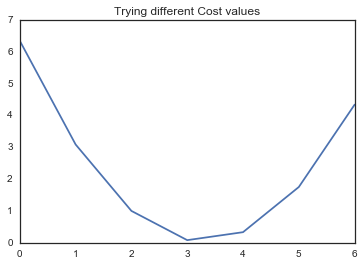

In [9]:
plt.plot(cost_list)
plt.title('Trying different Cost values')

# Gradient Descent

Equation:

- $w = w - \alpha * \frac{d}{dw}(C(w))$
- where alpha is a just a small number representing a small step = Learning Rate
- the partital derivative tells you which way to step!
- Therefore you will always descent toward the minimum

CAUTION:

- If $\alpha$ is too small, gradient descent  can be slow. 
- If $\alpha$ is too large, gradient descent  can overshoot the minimum. It may  fail to converge, or even diverge.

## SUDO CODE

1. Initalize your parameters randomly (in this case $w$)

2. Calculate the cost function for those parameters

3. Update your parameters based on the gradient decent function

4. After a number of iterations or until you error is changing by very little. We say it have convereged

### An Example of the code:

### Data description: 
ex1data1.txt: contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative profit is a loss.

In [10]:
#read in the data
data = pd.read_csv('data/ex1data1.txt', names=['Population', 'Profit'])

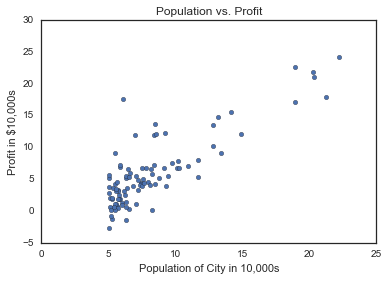

In [11]:
plt.title('Population vs. Profit')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.scatter(data['Population'], data['Profit'])

In [12]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [13]:
x = np.array(data.Population)[:, None] # population in 10,0000 --> use lower case because vector
y = np.array(data.Profit)# profit for a food truck
N = len(y) # number of training examples

In [14]:
ones = np.ones_like(x)
X = np.hstack((ones,x)) # Add a column of ones to x for the bias term
W = np.zeros(2) # initialize fitting parameters the notes say to 0

In [15]:
# gradient descent settings parametesr
iterations = 1500
alpha = 0.01

In [16]:
print (np.sum((np.dot(X, W) - y)**2))/(2*N)

32.0727338775


#### Create the cost function

In [17]:
def computeCost(X, y, W):
    # Initialize some useful values
    m = len(y) # number of training examples
    # Cost function J(theta)
    C = (np.sum((np.dot(X,W) - y)**2))/(2*m)
    return C

### Run and double check that it matches to assingment!

In [18]:
computeCost(X,y,W)

32.072733877455676

In [19]:
W = W - (alpha/N)*np.sum((np.dot(X,W)-y)[:,None]*X,axis=0) # sum over all examples

In [20]:
W

array([ 0.05839135,  0.6532885 ])

In [21]:
cost = np.zeros(iterations)
def gradientDescent(X, y, W, alpha, num_iters):
    
    N = len(y) # number of training examples for updating theta equation
    cost = np.zeros(num_iters)
    
    for i in range(num_iters):
        W = W - (alpha/N)*np.sum((np.dot(X,W)-y)[:,None]*X,axis=0)
        
        current_cost = computeCost(X, y, W)
        print('Cost function:', current_cost)
        cost[i] = current_cost
        
    return W, cost

In [22]:
W, hist = gradientDescent(X, y, W, alpha, iterations)

('Cost function:', 5.9315935686049563)
('Cost function:', 5.9011547070813881)
('Cost function:', 5.8952285864442207)
('Cost function:', 5.8900949431173304)
('Cost function:', 5.885004158443647)
('Cost function:', 5.8799324804914184)
('Cost function:', 5.8748790947625746)
('Cost function:', 5.8698439118063863)
('Cost function:', 5.8648268653129305)
('Cost function:', 5.8598278899321814)
('Cost function:', 5.8548469205722897)
('Cost function:', 5.849883892376587)
('Cost function:', 5.8449387407220339)
('Cost function:', 5.8400114012183613)
('Cost function:', 5.8351018097072265)
('Cost function:', 5.8302099022613882)
('Cost function:', 5.8253356151838629)
('Cost function:', 5.8204788850070992)
('Cost function:', 5.8156396484921542)
('Cost function:', 5.8108178426278698)
('Cost function:', 5.8060134046300442)
('Cost function:', 5.801226271940628)
('Cost function:', 5.7964563822268991)
('Cost function:', 5.7917036733806526)
('Cost function:', 5.7869680835173964)
('Cost function:', 5.7822495

In [23]:
W, hist

(array([-3.63077001,  1.16641043]),
 array([ 5.93159357,  5.90115471,  5.89522859, ...,  4.48341145,
         4.48338826,  4.48336514]))

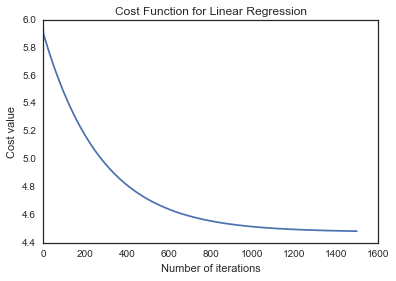

In [24]:
plt.title('Cost Function for Linear Regression')
plt.xlabel('Number of iterations')
plt.ylabel('Cost value')
plt.plot(hist)

In [25]:
W

array([-3.63077001,  1.16641043])

# plot with fit

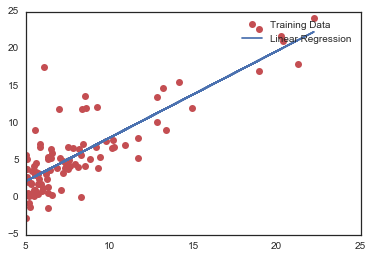

In [26]:
plt.plot(data['Population'],data['Profit'],'ro',data['Population'],np.dot(X,W),'b-')
plt.legend(['Training Data','Linear Regression'])

## Compare to Sklearn Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x,y)

In [ ]:
lr.intercept_

In [ ]:
lr.coef_

In [ ]:
x1 = np.array(3.5)
x1 = x1.reshape(-1,1)

In [ ]:
x2 = np.array(7)
x2 = x2.reshape(-1,1)

In [ ]:
predict1 = lr.predict(x1)
predict2 = lr.predict(x2)

In [ ]:
print predict1, predict2

In [ ]:
print lr.intercept_, lr.coef_
print W

# Binary Classification: Decision Trees

Classification Examples:

1. Email: Spam / Not Spam?
2. Online Transactions: Fraudulent (Yes / No)?
3. Tumor: Malignant / Benign ? 
    - 0: “Negative Class” (e.g., benign tumor) 
    - 1: “Positive Class” (e.g., malignant tumor) 

## Wind Surfing Example

- Is this data linearly seperable? No! But perhaps we can use lines to seperate the data into 2 classes?

display(HTML("<table><tr><td><img src='pics/DT.png'></td><td><img src='pics/DT2.png'></td></tr></table>"))

## How do we choose exactly where to split? Entropy!

- Impurities in the data. 
- We have to pick a line that give the most information gain!

# How to determine how well we have done?

Entropy = $\Sigma -p_i log_2 (p_i)$

- $p_i$ is the fraction of examples in class i
- Sum over all calsses
- Extremes - if all one class purity = 1 or entroy = 0
- Classes split %50 %50 then we would get a max entropy = 1

## Information Gain - DTs will Maximize IG

Information Gain = entropy of parent - weighted average(entropy of children)

## Confusion Matrix

<img src='pics/Confusion.png'>

## Precision Recall F1 Score

<img src='pics/PRF1.png'>

In [ ]:
from sklearn import neighbors, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

iris = datasets.load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)

clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train,y_train)




In [ ]:
clf.score(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
class_names = iris.target_names
y_pred = clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Natural Language Processing

## This tutorial was take from https://www.kaggle.com/c/word2vec-nlp-tutorial
## Highly reccomended to go through this on your own if you are interested in NLP

- NLP (Natural Language Processing) is a set of techniques for approaching text problems. 
- This page will help you get started with loading and cleaning the IMDB movie reviews, then applying a simple Bag of Words model to get surprisingly accurate predictions of whether a review is thumbs-up or thumbs-down.

In [1]:
import os
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from bs4 import BeautifulSoup 
from gensim.models import word2vec
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
import sys
import nltk
nltk.download()  # Download text data sets, including stop words
from nltk.corpus import stopwords # Import the stop word list

/Users/laurenmccarthy/anaconda2/lib/python2.7/site-packages/gensim-0.13.3-py2.7-macosx-10.6-x86_64.egg/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [2]:
# read in data and look at the shape
train = pd.read_csv('data/labeledTrainData.tsv', header=0, delimiter="\t", quoting=3) # ignore double quotes

In [3]:
train['review'][0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

## Clean up the Text

In [4]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words )) 

In [5]:
# Get the number of reviews based on the dataframe column size
num_reviews = train["review"].size

#Initialize an empty list to hold the clean reviews
clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in xrange( 0, num_reviews ):  
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_train_reviews.append( review_to_words( train["review"][i] ))

/Users/laurenmccarthy/anaconda2/lib/python2.7/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [6]:
clean_train_reviews[0]

u'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate worki

## Bag of Words

- Need to convert to numeric representation for machine learning process? 
- Very common approach is called a Bag of Words. 
- The Bag of Words model learns a vocabulary from all of the documents, then models each document by counting the number of times each word appears. 

<img src='pics/bagofwords.png'>

For example, consider the following two sentences:

- Sentence 1: "The cat sat on the hat"
- Sentence 2: "The dog ate the cat and the hat"

From these two sentences, our vocabulary is as follows:

{ the, cat, sat, on, hat, dog, ate, and }

To get our bags of words, we count the number of times each word occurs in each sentence. In Sentence 1, "the" appears twice, and "cat", "sat", "on", and "hat" each appear once, so the feature vector for Sentence 1 is:

{ the, cat, sat, on, hat, dog, ate, and }

Sentence 1: { 2, 1, 1, 1, 1, 0, 0, 0 }

Similarly, the features for Sentence 2 are: { 3, 1, 0, 0, 1, 1, 1, 1}

In the IMDB data, we have a very large number of reviews, which will give us a large vocabulary. To limit the size of the feature vectors, we should choose some maximum vocabulary size. Below, we use the 5000 most frequent words (remembering that stop words have already been removed).

In [7]:
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

In [8]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()

In [10]:
# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print('count', count, 'tag', tag)

('count', 187, 'tag', u'abandoned')
('count', 125, 'tag', u'abc')
('count', 108, 'tag', u'abilities')
('count', 454, 'tag', u'ability')
('count', 1259, 'tag', u'able')
('count', 85, 'tag', u'abraham')
('count', 116, 'tag', u'absence')
('count', 83, 'tag', u'absent')
('count', 352, 'tag', u'absolute')
('count', 1485, 'tag', u'absolutely')
('count', 306, 'tag', u'absurd')
('count', 192, 'tag', u'abuse')
('count', 91, 'tag', u'abusive')
('count', 98, 'tag', u'abysmal')
('count', 297, 'tag', u'academy')
('count', 485, 'tag', u'accent')
('count', 203, 'tag', u'accents')
('count', 300, 'tag', u'accept')
('count', 130, 'tag', u'acceptable')
('count', 144, 'tag', u'accepted')
('count', 92, 'tag', u'access')
('count', 318, 'tag', u'accident')
('count', 200, 'tag', u'accidentally')
('count', 88, 'tag', u'accompanied')
('count', 124, 'tag', u'accomplished')
('count', 296, 'tag', u'according')
('count', 186, 'tag', u'account')
('count', 81, 'tag', u'accuracy')
('count', 284, 'tag', u'accurate')
('

## Apply machine learning model!

In [11]:
print "Training the random forest..."
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

X_train, X_test, y_train, y_test = train_test_split(train_data_features, train["sentiment"], test_size=0.33, random_state=42)
# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( X_train, y_train )

forest.score(X_test, y_test)

Training the random forest...


0.84363636363636363

## Let's see if we can improve on this by using word2vec?

- What is a word vector?
-  What is the Word2Vec algorithm. 
- (For an overview of deep learning, as well as pointers to some additional tutorials, see the "What is Deep Learning?" page).
- In Python, we will use the excellent implementation of word2vec from the gensim package. If you don't already have gensim installed, you'll need to install it.

<img src='pics/word2vec.png'>

In [ ]:
# Read in unlabeled data for training the word vector 
train = pd.read_csv( "data/labeledTrainData.tsv", header=0, delimiter="\t", quoting=3 )
unlabeled_train = pd.read_csv( "data/unlabeledTrainData.tsv", header=0, delimiter="\t", quoting=3 )

train.shape, unlabeled_train.shape

# training our word2vec model

In [ ]:
from KaggleWord2VecUtility import KaggleWord2VecUtility

# Read data from files 
train = pd.read_csv( "data/labeledTrainData.tsv", header=0, delimiter="\t", quoting=3 )
unlabeled_train = pd.read_csv( "data/unlabeledTrainData.tsv", header=0, delimiter="\t", quoting=3 )

In [ ]:
# Load the punkt tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [ ]:
# ****** Split the labeled and unlabeled training sets into clean sentences
sentences = []  # Initialize an empty list of sentences

print "Parsing sentences from training set"
for review in train["review"]:
    sentences += KaggleWord2VecUtility.review_to_sentences(review, tokenizer)

print "Parsing sentences from unlabeled set"
for review in unlabeled_train["review"]:
    sentences += KaggleWord2VecUtility.review_to_sentences(review, tokenizer)

In [ ]:
# Set values for various parameters
num_features = 300    # Word vector dimensionality
min_word_count = 40   # Minimum word count
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
model = Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling, seed=1)

# If you don't plan to train the model any further, calling
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "300features_40minwords_10context"
model.save(model_name)

In [ ]:
# Create average word vectors
trainDataVecs = getAvgFeatureVecs( getCleanReviews(train), model, num_features )

In [ ]:
# ****** Fit a random forest to the training set, then make predictions
#
# Fit a random forest to the training data, using 100 trees
forest = RandomForestClassifier( n_estimators = 100 )

X_train, X_test, y_train, y_test = train_test_split(trainDataVecs, train["sentiment"], test_size=0.33, random_state=42)


print "Fitting a random forest to labeled training data..."
forest = forest.fit( trainDataVecs, train["sentiment"] )

# Test & extract results
result = forest.predict( testDataVecs )

# This may take a few minutes to run
forest = forest.fit( X_train, y_train )

print forest.score(X_test, y_test)

# Playing around with word2vec

In [ ]:
model.doesnt_match("man woman child kitchen".split())
model.doesnt_match("france england germany berlin".split())
model.doesnt_match("paris berlin london austria".split())
model.most_similar("man")
model.most_similar("queen")
model.most_similar("awful")

# Neural Networks

- In the simpliest Form Neural Networks are just simply Linear Models
- By adding nodes we can somewhat create new features
- These features can be highly non-linear and encode a lot of information

<img src='pics/NN.png'>

In [ ]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X, y)

# Clustering Unsupervised Learning: Kmeans

- Type of unsupervised learning
- K means algorith creates clusters

<img src='pics/Kmeans.png'>

## SUDO CODE

1. Randomly initalize K cluster centroids
2. Find the closest Euclidian distance to each of the points
3. Update the centroids

## Negatives: How do I choose K?

- If you have some intuition about the problem?
- How about plotting differnt K's along with their cost function and look for the drop off?
- Other higher level algrithms that help with this.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()